In [1]:
# Social Media Sentiment Analysis

In [2]:
## Environment Setup

In [3]:
!pip install praw

In [4]:
import praw
import pandas as pd

import os
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id = os.getenv("CLIENT_ID"),      # Replace with your Client ID
    client_secret = os.getenv("CLIENT_SECRET"),  # Replace with your Secret
    user_agent="SM-SentimentAnalysis"  # Replace with your app name
)

In [5]:
## Scraping Data

In [6]:
### Creating DataFrame

In [7]:
# Selecting sentiment analysis topic
subreddit = reddit.subreddit("MachineLearning")

# Then you fetch the posts
posts = []
for submission in subreddit.top(limit=100):  # Fetch top 100 posts
    posts.append([
        submission.title,       # Post title
        submission.selftext,    # Post content
        submission.score,       # Upvotes
        submission.num_comments # Number of comments
    ])

# Convert the posts to a DataFrame
df = pd.DataFrame(posts, columns=["Title", "Content", "Score", "Comments"])
print(df.head())


                                               Title Content  Score  Comments
0  [Project] From books to presentations in 10s w...           8379       196
1  [D] A Demo from 1993 of 32-year-old Yann LeCun...           6249       135
2  [R] First Order Motion Model applied to animat...           4871       109
3  [D] This AI reveals how much time politicians ...           4854       236
4  [N] AI can turn old photos into moving Images ...           4795       230


In [8]:
### Saving Data

In [9]:
# Save the DataFrame to a CSV file
df.to_csv("reddit_ai_posts.csv", index=False)
print("Data saved to reddit_mlposts.csv")

Data saved to reddit_mlposts.csv


In [10]:
## Exploratory Data Analysis

In [11]:
### Inspecting the Data

In [12]:
# printing the first few rows
print(df.head())

# displays the df information
print(df.info())

# summary of stats such as column types and null values
print(df.describe())

                                               Title Content  Score  Comments
0  [Project] From books to presentations in 10s w...           8379       196
1  [D] A Demo from 1993 of 32-year-old Yann LeCun...           6249       135
2  [R] First Order Motion Model applied to animat...           4871       109
3  [D] This AI reveals how much time politicians ...           4854       236
4  [N] AI can turn old photos into moving Images ...           4795       230
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     100 non-null    object
 1   Content   100 non-null    object
 2   Score     100 non-null    int64 
 3   Comments  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB
None
             Score    Comments
count   100.000000  100.000000
mean   2197.220000  152.590000
std    1138.709367  135.728271
min    1240.000000   2

In [13]:
### Preprocessing

In [14]:
# improve accuracy, remove noise, and add consistent formatting

In [15]:
import re

# Change all of the titles to lowercase
df["Cleaned_Title"] = df["Title"].str.lower()

# Remove the punctuation and special characters
df["Cleaned_Title"] = df["Cleaned_Title"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

# Display the processed DataFrame
print(df.head())

                                               Title Content  Score  Comments  \
0  [Project] From books to presentations in 10s w...           8379       196   
1  [D] A Demo from 1993 of 32-year-old Yann LeCun...           6249       135   
2  [R] First Order Motion Model applied to animat...           4871       109   
3  [D] This AI reveals how much time politicians ...           4854       236   
4  [N] AI can turn old photos into moving Images ...           4795       230   

                                       Cleaned_Title  
0  project from books to presentations in s with ...  
1  d a demo from  of yearold yann lecun showing o...  
2  r first order motion model applied to animate ...  
3  d this ai reveals how much time politicians st...  
4  n ai can turn old photos into moving images  l...  


In [16]:
### Visualizing Data

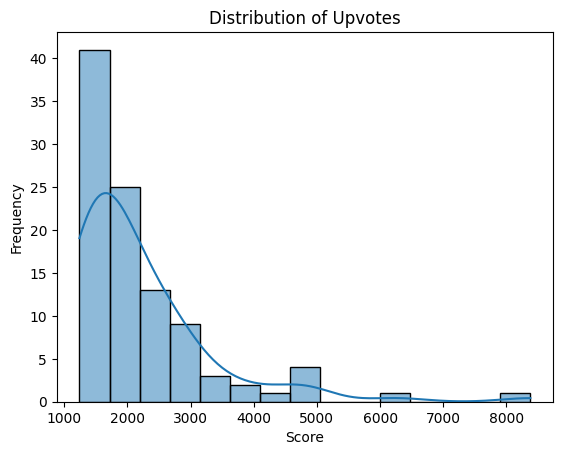

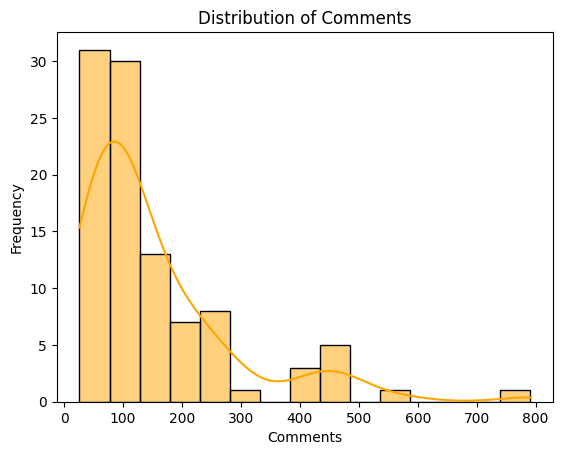

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of upvotes
sns.histplot(df["Score"], kde=True)
plt.title("Distribution of Upvotes")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of comments
sns.histplot(df["Comments"], kde=True, color="orange")
plt.title("Distribution of Comments")
plt.xlabel("Comments")
plt.ylabel("Frequency")
plt.show()

In [18]:
## Sentiment Analysis

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on titles
df["Sentiment"] = df["Title"].apply(lambda x: analyzer.polarity_scores(x)["compound"]) # overall sentiment
print(df.head(20))

                                                Title  \
0   [Project] From books to presentations in 10s w...   
1   [D] A Demo from 1993 of 32-year-old Yann LeCun...   
2   [R] First Order Motion Model applied to animat...   
3   [D] This AI reveals how much time politicians ...   
4   [N] AI can turn old photos into moving Images ...   
5                [D] Types of Machine Learning Papers   
6   I made a robot that punishes me if it detects ...   
7   [D] The machine learning community has a toxic...   
8   [Project] NEW PYTHON PACKAGE: Sync GAN Art to ...   
9   [P] Using oil portraits and First Order Model ...   
10  [D] Convolution Neural Network Visualization -...   
11  [P] Doing a clone of Rocket League for AI expe...   
12  [R] Speech-to-speech translation for a real-wo...   
13  [D] Our community must get serious about oppos...   
14  [P] I made a command-line tool that explains y...   
15  [P] Using Deep Learning to draw and write with...   
16  [R] Consistent Video Depth 

In [20]:
### Analysis of Sentiment Analysis

In [21]:
#### Finding Common Terms

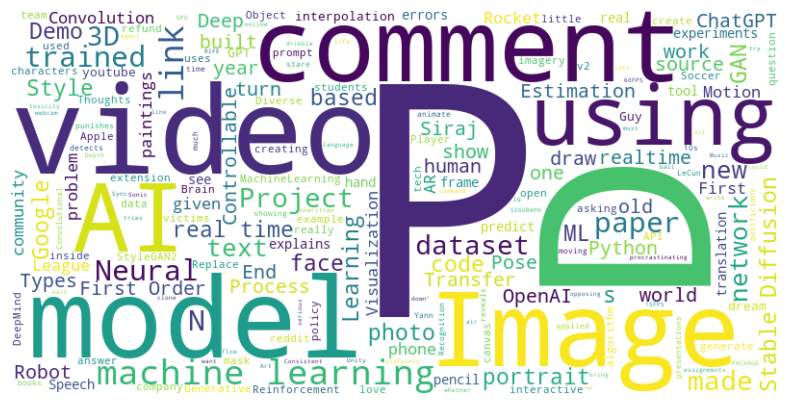

In [22]:
from wordcloud import WordCloud

# Combining all titles
text = " ".join(title for title in df["Title"])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
df.to_csv("processed_reddit_ai_posts.csv", index=False)
print("Processed data saved to processed_reddit_ai_posts.csv")

Processed data saved to processed_reddit_ai_posts.csv


In [24]:
#### Correlation Analysis

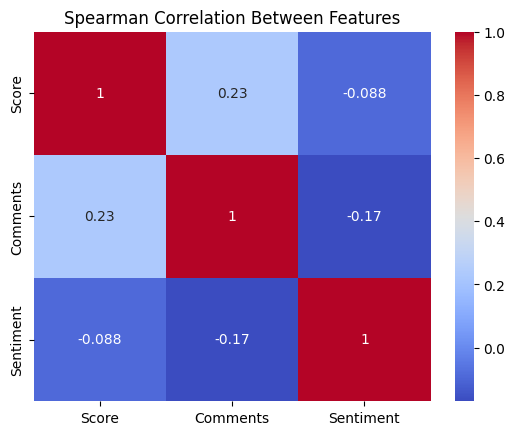

In [25]:
# Spearman correlation heatmap
correlation = df[["Score", "Comments", "Sentiment"]].corr(method="spearman")
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Between Features")
plt.show()